In [2]:
import pandas as pd

In [3]:
#import dataset from demo.py output
df_og = pd.read_csv("data/df_demo.csv")
df_og.head()

C:\Users\mjvuo\AppData\Local\Temp\ipykernel_9680\2218594448.py:2: DtypeWarning: Columns (53,57,69,71,77,79,87,89,91,93,95,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df_og = pd.read_csv("data/df_demo.csv")


,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE_CRASH,LONGITUDE_CRASH,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF_STREET_NAME,...,WT10,WT10_ATTRIBUTES,WT11,WT11_ATTRIBUTES,pop_density_meters,population,population_error,land_area_sq_meter,land_area_error,ZCTA
0,2023-11-01,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,NaN,NaN,NaN,NaN,18.726914,90245.0,2834.0,4819.0,415.0,11230.0
1,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,38.185669,108180.0,4765.0,2833.0,482.0,11208.0
2,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,41.876574,83125.0,3181.0,1985.0,480.0,11233.0
3,2021-12-14,17:05,NaN,11249.0,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,62.533981,45087.0,2556.0,721.0,258.0,11249.0
4,2021-12-14,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,NaN,NaN,NaN,NaN,34.841473,43517.0,3448.0,1249.0,411.0,10475.0


In [4]:
df_og.shape

(1655628, 110)

In [5]:
#Remove the duplicate and attribute columns
df = df_og.loc[:, ~df_og.columns.str.endswith('_ATTRIBUTES')]

duplicate_columns = ["LOCATION", "LATITUDE_ACCIDENT", "LONGITUDE_ACCIDENT", "DATE_CRASH", "DATE_WEATHER_STATION", "ZIP_CODE_IMPUTED"]
df = df.drop(columns=duplicate_columns)


In [6]:
#Calculate percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage_df = missing_percentage.to_frame(name='Missing Percentage').sort_values(by='Missing Percentage', ascending=False)
missing_percentage_df

,Missing Percentage
MDSF,100.000000
WT10,100.000000
WT11,100.000000
DASF,100.000000
PSUN,99.999879
...,...
NUMBER_OF_CYCLIST_INJURED,0.000000
NUMBER_OF_CYCLIST_KILLED,0.000000
NUMBER_OF_PEDESTRIANS_INJURED,0.000000
COLLISION_ID,0.000000


In [7]:
pd.options.display.max_seq_items = 105
missing_percentage_df[missing_percentage_df['Missing Percentage'] < 50]

,Missing Percentage
CROSS_STREET_NAME,42.207187
SNOW,27.068218
BOROUGH,26.625124
ON_STREET_NAME,22.993329
VEHICLE_TYPE_CODE_2,21.704634
CONTRIBUTING_FACTOR_VEHICLE_2,16.875288
PRCP,1.989336
pop_density_meters,1.202142
population_error,0.879243
ZCTA,0.879243


In [8]:
missing_percentage_df[missing_percentage_df['Missing Percentage'] >= 50]

,Missing Percentage
MDSF,100.000000
WT10,100.000000
WT11,100.000000
DASF,100.000000
PSUN,99.999879
TSUN,99.985685
WT05,99.966720
WT09,99.927580
WT06,99.714006
WT04,99.652156


In [9]:
#Remove all columns with more than 60% missing data
df = df.loc[:, df.isnull().mean() <= 0.6]
df.head()


,CRASH_DATE,CRASH_TIME,BOROUGH,ZIP_CODE,LATITUDE_CRASH,LONGITUDE_CRASH,ON_STREET_NAME,CROSS_STREET_NAME,NUMBER_OF_PERSONS_INJURED,NUMBER_OF_PERSONS_KILLED,...,SNOW,SNWD,TMAX,TMIN,pop_density_meters,population,population_error,land_area_sq_meter,land_area_error,ZCTA
0,2023-11-01,1:29,BROOKLYN,11230.0,40.621790,-73.970024,OCEAN PARKWAY,AVENUE K,1.0,0.0,...,NaN,NaN,NaN,NaN,18.726914,90245.0,2834.0,4819.0,415.0,11230.0
1,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.866500,NaN,NaN,0.0,0.0,...,0.0,NaN,NaN,NaN,38.185669,108180.0,4765.0,2833.0,482.0,11208.0
2,2021-12-14,8:13,BROOKLYN,11233.0,40.683304,-73.917274,SARATOGA AVENUE,DECATUR STREET,0.0,0.0,...,0.0,0.0,NaN,NaN,41.876574,83125.0,3181.0,1985.0,480.0,11233.0
3,2021-12-14,17:05,NaN,11249.0,40.709183,-73.956825,BROOKLYN QUEENS EXPRESSWAY,NaN,0.0,0.0,...,0.0,0.0,NaN,NaN,62.533981,45087.0,2556.0,721.0,258.0,11249.0
4,2021-12-14,8:17,BRONX,10475.0,40.868160,-73.831480,NaN,NaN,2.0,0.0,...,0.0,0.0,54.0,44.0,34.841473,43517.0,3448.0,1249.0,411.0,10475.0


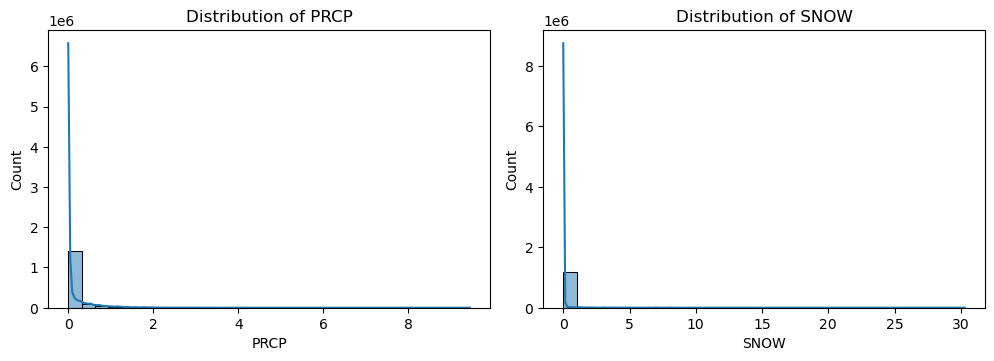

In [10]:
#Create histograms for PRCP and SNOW
import matplotlib.pyplot as plt
import seaborn as sns


impute_columns = ["PRCP", "SNOW"]
plt.figure(figsize=(15, 10))

for i, col in enumerate(impute_columns, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [12]:
#Impute missing data for PRCP and SNOW
from fancyimpute import IterativeImputer
df[impute_columns] = IterativeImputer(max_iter=10, random_state=42).fit_transform(df[impute_columns])

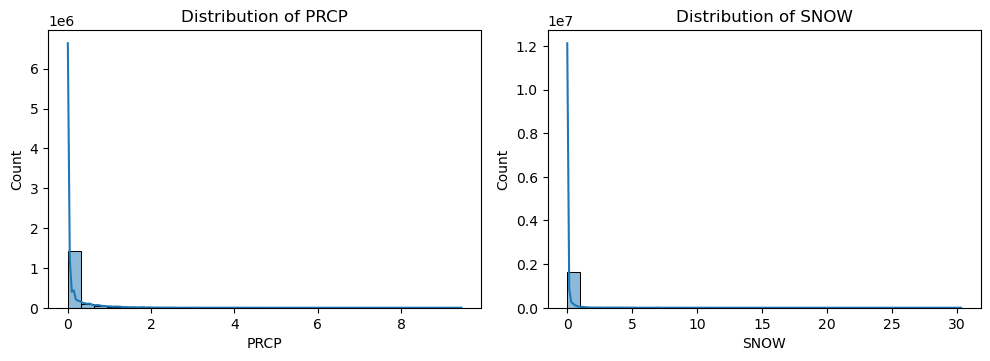

In [13]:
#Plot histograms for PRCP and SNOW again 
plt.figure(figsize=(15, 10))

for i, col in enumerate(impute_columns, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [14]:
df.dtypes

CRASH_DATE                        object
CRASH_TIME                        object
BOROUGH                           object
ZIP_CODE                         float64
LATITUDE_CRASH                   float64
LONGITUDE_CRASH                  float64
ON_STREET_NAME                    object
CROSS_STREET_NAME                 object
NUMBER_OF_PERSONS_INJURED        float64
NUMBER_OF_PERSONS_KILLED         float64
NUMBER_OF_PEDESTRIANS_INJURED      int64
NUMBER_OF_PEDESTRIANS_KILLED       int64
NUMBER_OF_CYCLIST_INJURED          int64
NUMBER_OF_CYCLIST_KILLED           int64
NUMBER_OF_MOTORIST_INJURED         int64
NUMBER_OF_MOTORIST_KILLED          int64
CONTRIBUTING_FACTOR_VEHICLE_1     object
CONTRIBUTING_FACTOR_VEHICLE_2     object
COLLISION_ID                       int64
VEHICLE_TYPE_CODE_1               object
VEHICLE_TYPE_CODE_2               object
STATION                           object
LATITUDE_WEATHER_STATION         float64
LONGITUDE_WEATHER_STATION        float64
DISTANCE_FROM_WE

In [15]:
#Convert date and time to datetime types and then combine them
df["CRASH_DATE2"] = pd.to_datetime(df["CRASH_DATE"], errors='coerce')
df["CRASH_TIME2"] = pd.to_datetime(df["CRASH_TIME"], format="%H:%M", errors='coerce').dt.time
df["CRASH_DATETIME"] = pd.to_datetime(df["CRASH_DATE2"].astype(str) + " " + df["CRASH_TIME2"].astype(str), errors='coerce')

In [16]:
#Create new columns from datetime column
df["YEAR"] = df["CRASH_DATETIME"].dt.year
df["MONTH"] = df["CRASH_DATETIME"].dt.month
df["DAY"] = df["CRASH_DATETIME"].dt.day
df["HOUR"] = df["CRASH_DATETIME"].dt.hour

In [17]:
#Remore more duplicate columns
duplicate_columns = ["CRASH_DATE", "CRASH_TIME", "CRASH_DATE2", "CRASH_TIME2", "LATITUDE_WEATHER_STATION.1", "LONGITUDE_WEATHER_STATION.1"]
df = df.drop(columns=duplicate_columns)

In [18]:
#Replace missing values in string columns with 'MISSING'
df.loc[:, df.dtypes == "object"] = df.loc[:, df.dtypes == "object"].fillna("MISSING")


In [19]:
#Drop missing rows 
df = df.dropna(subset=["ZIP_CODE", "NUMBER_OF_PERSONS_KILLED", "NUMBER_OF_PERSONS_INJURED"])
missing_percentage3 = df.isnull().sum()
missing_percentage3_df = missing_percentage3.to_frame(name='Missing Percentage').sort_values(by='Missing Percentage', ascending=False)
missing_percentage3_df

,Missing Percentage
TMAX,981280
TMIN,981268
SNWD,834863
pop_density_meters,18581
land_area_sq_meter,13235
population,13235
population_error,13235
land_area_error,13235
ZCTA,13235
NUMBER_OF_PEDESTRIANS_INJURED,0


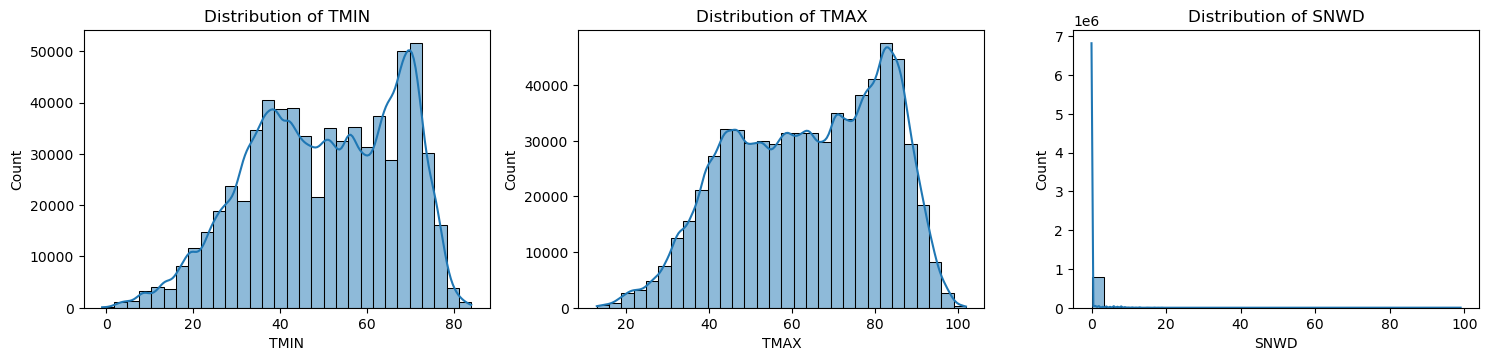

In [20]:
#Plot histograms for TMIN, TMAX, and SNWD
impute_columns_2 = ["TMIN", "TMAX", "SNWD"]
plt.figure(figsize=(15, 10))

for i, col in enumerate(impute_columns_2, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [21]:
#Create function to use decision tree to impute values in a given column
from sklearn.tree import DecisionTreeRegressor

features = ["PRCP", "SNOW", "MONTH", "LATITUDE_CRASH", "LONGITUDE_CRASH"]


def impute_with_decision_tree(df, target_column, features):
    df_train = df.dropna(subset=[target_column] + features)
    df_missing = df[df[target_column].isnull()]

    if df_missing.empty:
        return df

    model = DecisionTreeRegressor(max_depth=5, random_state=42)
    model.fit(df_train[features], df_train[target_column])

    df.loc[df[target_column].isnull(), target_column] = model.predict(df_missing[features])
    return df


In [22]:
#Impute TMIN, TMAX, SNWD using DT
df = impute_with_decision_tree(df, "TMIN", features)
df = impute_with_decision_tree(df, "TMAX", features)
df = impute_with_decision_tree(df, "SNWD", features)

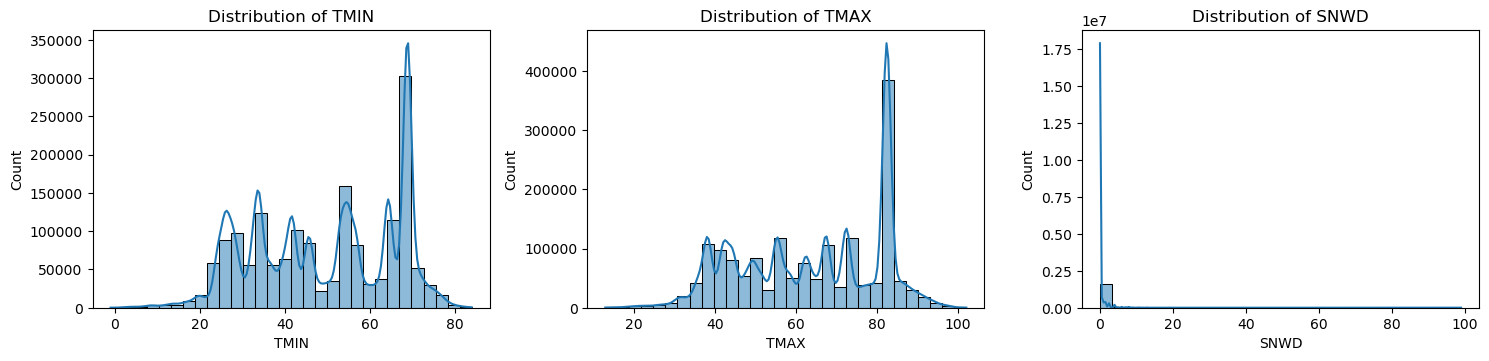

In [23]:
#Plot histograms after imputation
impute_columns_2 = ["TMIN", "TMAX", "SNWD"]
plt.figure(figsize=(15, 10))

for i, col in enumerate(impute_columns_2, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(df[col], kde=True, bins=30)  
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [24]:
#Convert zip code to string
df["ZIP_CODE"] = df["ZIP_CODE"].astype(str)

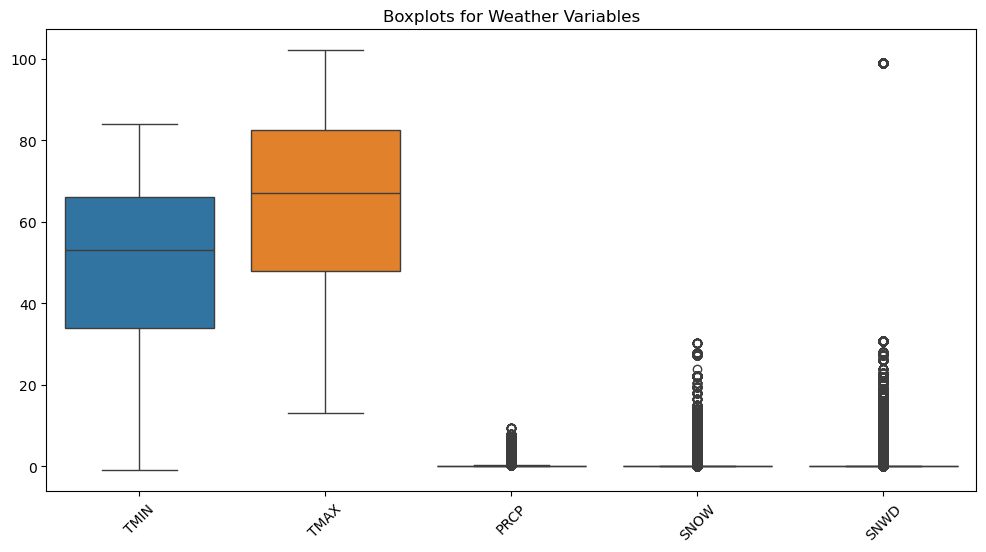

In [25]:
#Boxplots for weather columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["TMIN", "TMAX", "PRCP", "SNOW", "SNWD"]])
plt.xticks(rotation=45)
plt.title("Boxplots for Weather Variables")
plt.show()

In [26]:
#Check SNOW values for high SNWD values
df[df["SNWD"] > 40]["SNOW"].value_counts()

SNOW
0.0    137
Name: count, dtype: int64

In [27]:
#Check most common SWND value for when SNOW = 0
df[df["SNOW"] == 0]["SNWD"].value_counts()

SNWD
0.000000     742441
0.001628     226217
0.013489      33049
1.194193      31618
0.131872      26194
              ...  
3.800000          4
0.600000          4
8.300000          3
16.000000         3
14.200000         1
Name: count, Length: 90, dtype: int64

In [28]:
#Replace large values of SNWD with 0
df.loc[df["SNWD"] > 40, "SNWD"] = 0


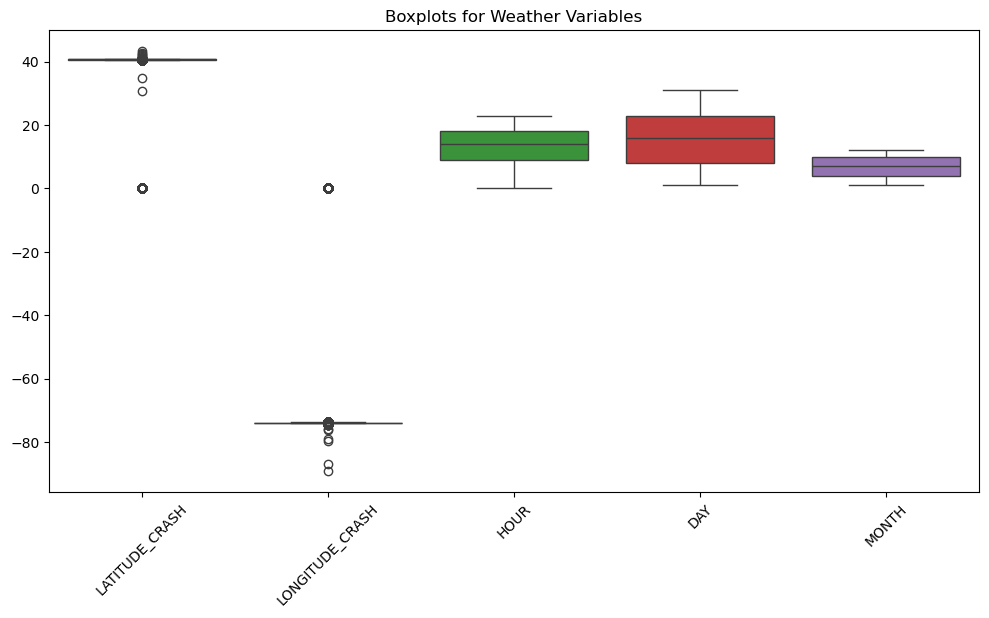

In [29]:
#Plot lat, long, and time values
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["LATITUDE_CRASH", "LONGITUDE_CRASH", "HOUR", "DAY", "MONTH"]])
plt.xticks(rotation=45)
plt.title("Boxplots for Weather Variables")
plt.show()

In [30]:
#Remove rows where lat/long = 0
df = df[df["LATITUDE_CRASH"] != 0]

In [31]:
#Remove lat/long values that are outside of NYC
df = df[(df["LATITUDE_CRASH"].between(40.49, 40.92)) & (df["LONGITUDE_CRASH"].between(-74.26, -73.70))]

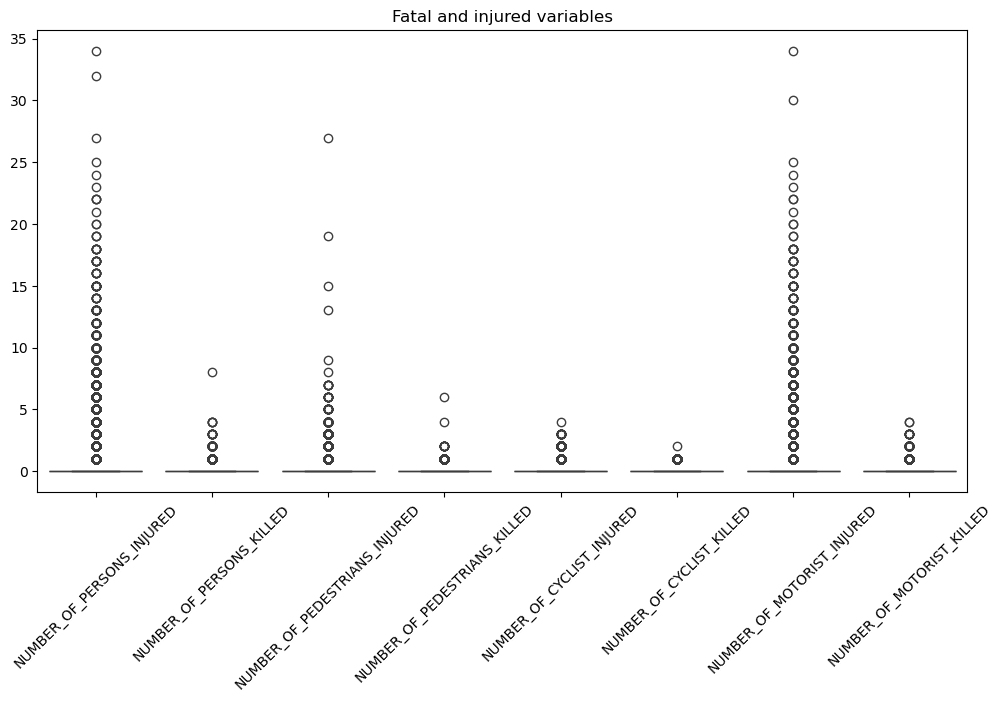

In [32]:
#Plot the injury and fatality values
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["NUMBER_OF_PERSONS_INJURED", "NUMBER_OF_PERSONS_KILLED", "NUMBER_OF_PEDESTRIANS_INJURED", "NUMBER_OF_PEDESTRIANS_KILLED", "NUMBER_OF_CYCLIST_INJURED", "NUMBER_OF_CYCLIST_KILLED", "NUMBER_OF_MOTORIST_INJURED", "NUMBER_OF_MOTORIST_KILLED" ]].sample(1000))
plt.xticks(rotation=45)
plt.title("Fatal and injured variables")
plt.show()

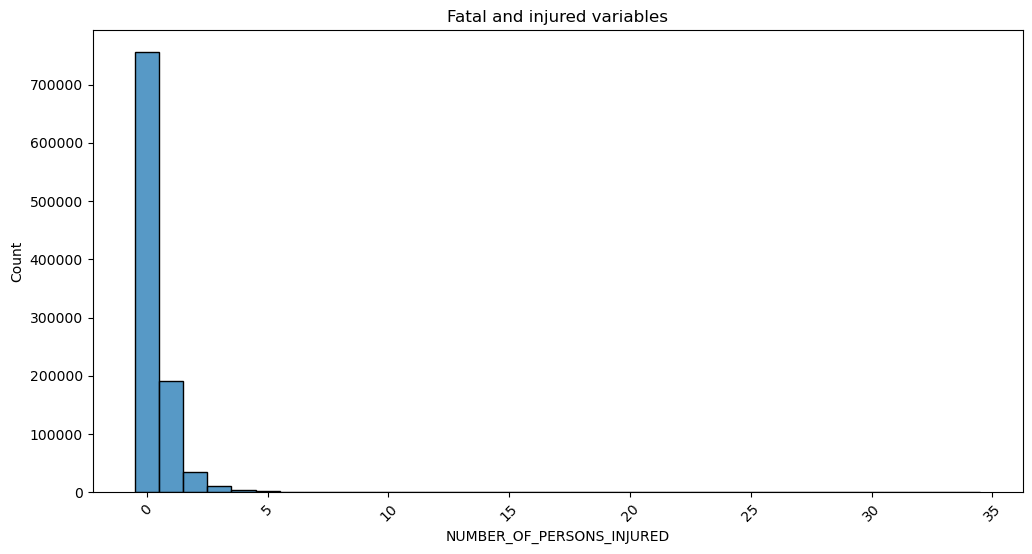

In [48]:
#Plot the injury and fatality values
plt.figure(figsize=(12, 6))
sns.histplot(data=df["NUMBER_OF_PERSONS_INJURED"].sample(1000000), discrete=True, binwidth=1)
plt.xticks(rotation=45)
plt.title("Fatal and injured variables")
plt.show()

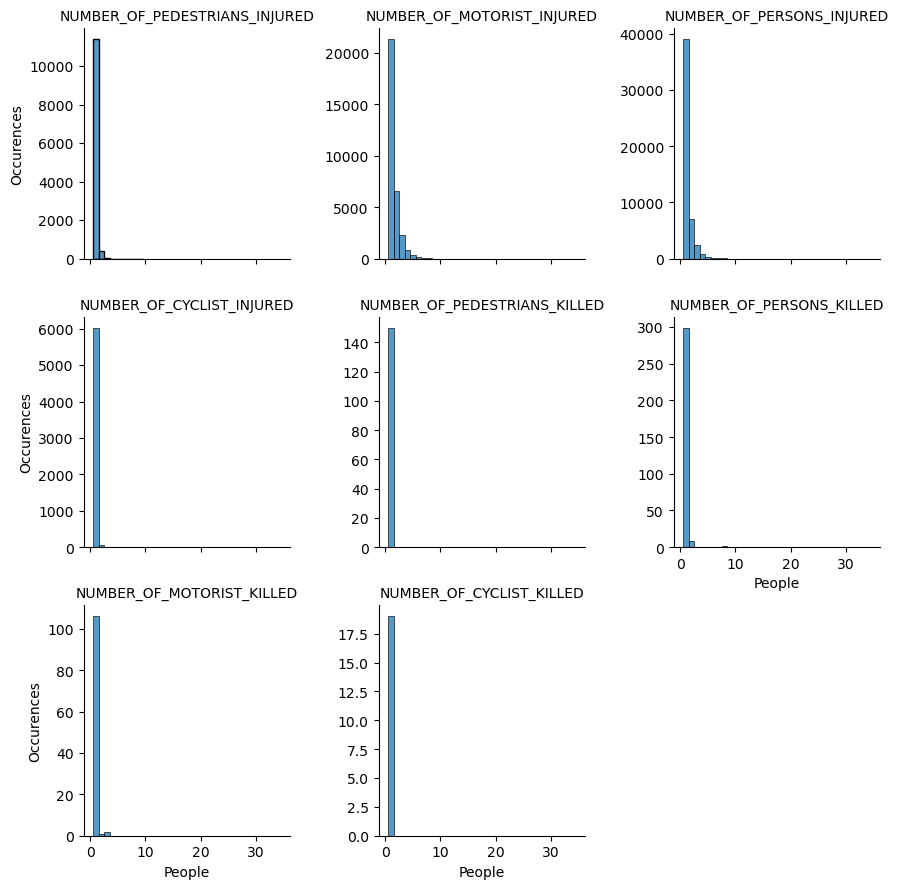

In [69]:

cols = [
    "NUMBER_OF_PERSONS_INJURED",
    "NUMBER_OF_PERSONS_KILLED",
    "NUMBER_OF_PEDESTRIANS_INJURED",
    "NUMBER_OF_PEDESTRIANS_KILLED",
    "NUMBER_OF_CYCLIST_INJURED",
    "NUMBER_OF_CYCLIST_KILLED",
    "NUMBER_OF_MOTORIST_INJURED",
    "NUMBER_OF_MOTORIST_KILLED",
]
test = df.reset_index()[["index"]+cols].melt(id_vars="index").query("value != 0").sample(100000)
g = sns.FacetGrid(test, col='variable',col_wrap= 3, sharey=False)

# Map histplot to each facet
g.map(sns.histplot, 'value', discrete=True, binwidth=1)
g.set_titles(col_template="{col_name}")

# Customize (optional)
g.set_axis_labels('People', 'Occurences')
# g.fig.suptitle('Distribution of Total Bill by Smoker and Sex')
# plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap
plt.show()


In [33]:
#Export df
df.to_csv("data/cleaned_data.csv", index=False)

KeyboardInterrupt: 